********************************************************************************************************************************
# ML Lab 06 - Classification I (Decision Trees)
<hr/>

By: **Virendra Singh** <br>
Linkedin: https://www.linkedin.com/in/singhviren7/
 
<hr/>


## Lab Overview  
### Objectives

- Perform Classification using Decision Trees.
- Demonstrate Multiple Datasets, do the necessary EDA and show various evaluation metrics.

### Problem Definition
- We have to predict the classification in data and to explore the different features of it. 
- Data analysis EDA to be done with various visulization and dealing with odd features.
- Preapering the data for the prediction and compairing different parameters.

### Approach
`Data exploration is the first step of data analysis used to explore and visualize data to uncover insights from the start or identify areas or patterns to dig into more.`
- First load the data and explore it's various features and parameters.
- In EDA part using visulization various plota are drawn and different inshights are gathered.
- Preaper the data for modling. Using Descision Trees we will predict the values and find out the different parameters.
- Compare different values and explote the parameters of Descision Trees.

## CODE:

In [1]:
# Importing the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

<hr>

## Data Set Information:

This data set was generated to model psychological experimental results. Each example is classified as having the balance scale tip to the right, tip to the left, or be balanced. 
The attributes are the left weight, the left distance, the right weight, and the right distance. The correct way to find the class is the greater of (left-distance * left-weight) and (right-distance * right-weight). If they are equal, it is balanced.


Attribute Information:

    1. Class Name: 3 (L, B, R) 
    2. Left-Weight: 5 (1, 2, 3, 4, 5) 
    3. Left-Distance: 5 (1, 2, 3, 4, 5) 
    4. Right-Weight: 5 (1, 2, 3, 4, 5) 
    5. Right-Distance: 5 (1, 2, 3, 4, 5)
    
    Data Set Characteristics:  Multivariate
    Attribute Characteristics: Categorical
    Number of Instances: 625
    Number of Attributes:4

<hr>


##  Importing the dataset:

In [2]:
df = pd.read_csv('balance-scalel06.data',sep= ',', header= None,names=['Class Name', 'Left-Weight', 'Left-Distance', 
                                                                    'Right-Weight', 'Right-Distance'])

In [3]:
df.head()

,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


### Checking the length & dimensions of our dataframe, we can use len() method & “.shape”.

In [4]:
print ("Dataset Lenght:: ", len(df))
print ("Dataset Shape:: ", df.shape)

Dataset Lenght::  625
Dataset Shape::  (625, 5)


### Checking the Statistical description of our dataset.

In [5]:
df.describe(include='all')

,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
count,625,625.000000,625.000000,625.000000,625.000000
unique,3,NaN,NaN,NaN,NaN
top,R,NaN,NaN,NaN,NaN
freq,288,NaN,NaN,NaN,NaN
mean,NaN,3.000000,3.000000,3.000000,3.000000
std,NaN,1.415346,1.415346,1.415346,1.415346
min,NaN,1.000000,1.000000,1.000000,1.000000
25%,NaN,2.000000,2.000000,2.000000,2.000000
50%,NaN,3.000000,3.000000,3.000000,3.000000
75%,NaN,4.000000,4.000000,4.000000,4.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class Name      625 non-null    object
 1   Left-Weight     625 non-null    int64 
 2   Left-Distance   625 non-null    int64 
 3   Right-Weight    625 non-null    int64 
 4   Right-Distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


<hr>

### Label Encoding the 'Class' column 
- We see here that most of the times either the scale is in left or right state. Very few cases are there in which the scale is balanced.

<AxesSubplot:xlabel='Class Name', ylabel='count'>

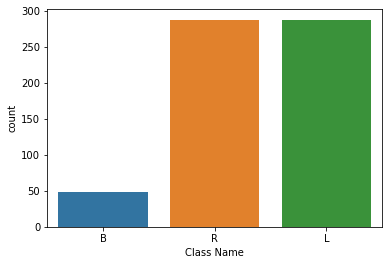

In [7]:
sns.countplot(df['Class Name'])

In [8]:
df['Class Name'] = LabelEncoder().fit_transform(df['Class Name'].tolist())

##   Pair plot after doing label encoding 

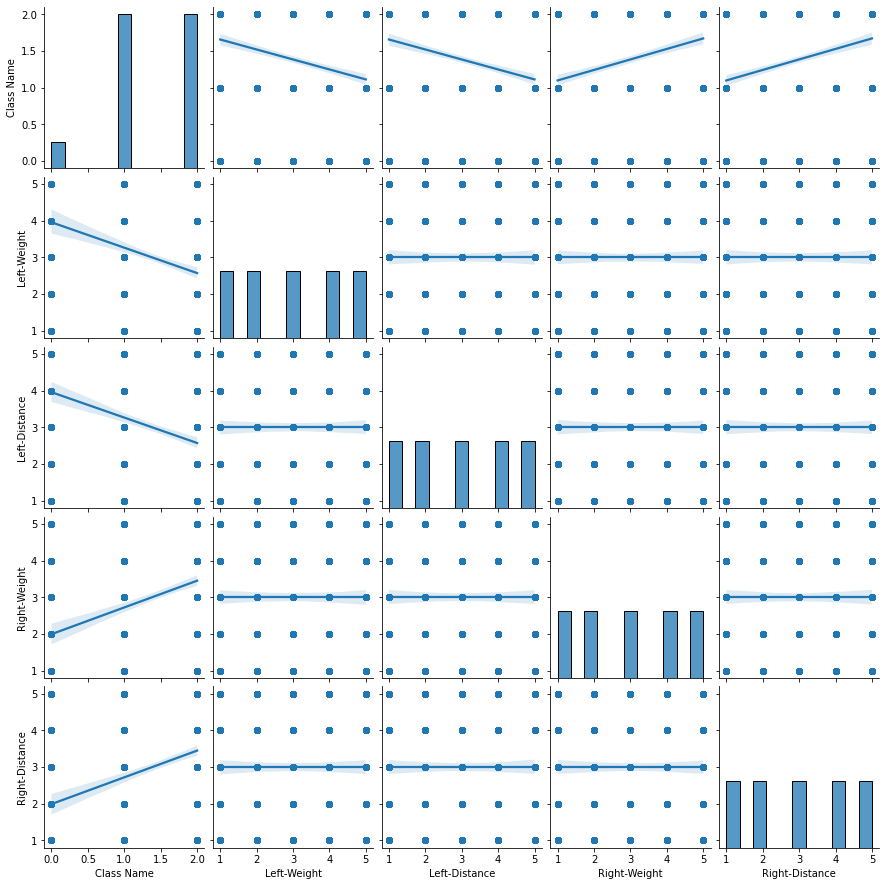

In [9]:
#pairplot
sns.pairplot(df, kind="reg")
plt.show()

##  Heatmap

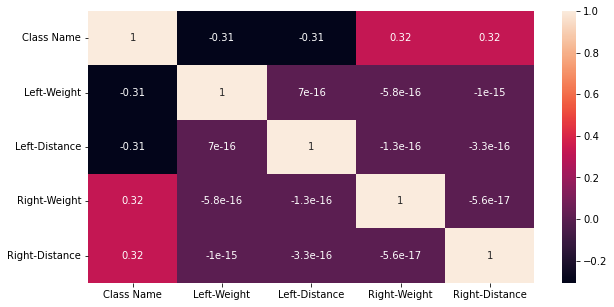

In [10]:
#Heatmap
num_feat = df.select_dtypes(include=np.number).columns
plt.figure(figsize= (10, 5))
sns.heatmap(df.corr(), annot = True)
plt.show()

Conclusion : Plots show that the other attributes are equally correlated to Class.

Hence, droping other columns except for 'Class' is not required

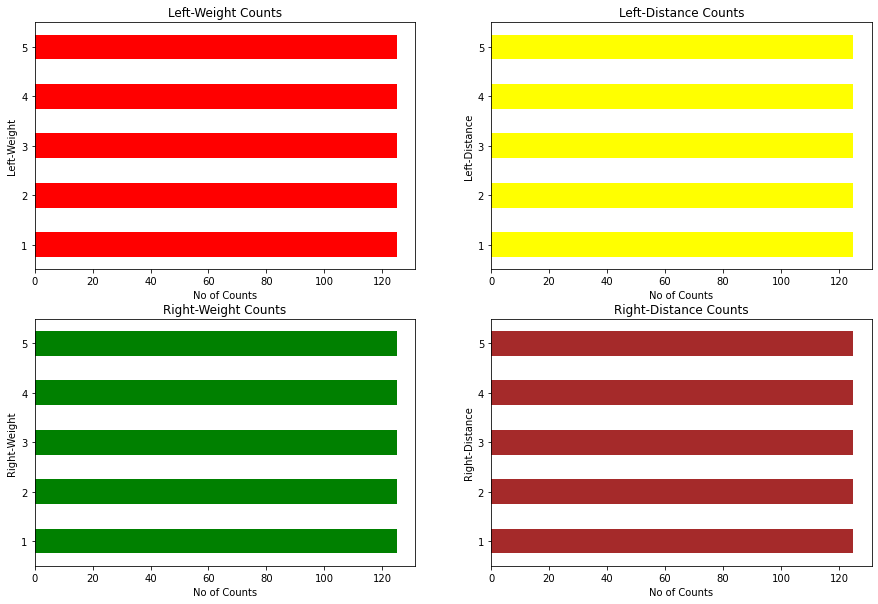

In [11]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
df['Left-Weight'].value_counts().plot(kind='barh', color='red')
plt.xlabel("No of Counts")
plt.ylabel('Left-Weight')
plt.title('Left-Weight Counts')

plt.subplot(2,2,2)
df['Left-Distance'].value_counts().plot(kind='barh', color='yellow')
plt.xlabel("No of Counts")
plt.ylabel('Left-Distance')
plt.title('Left-Distance Counts')

plt.subplot(2,2,3)
df['Right-Weight'].value_counts().plot(kind='barh', color='green')
plt.xlabel("No of Counts")
plt.ylabel('Right-Weight')
plt.title('Right-Weight Counts')

plt.subplot(2,2,4)
df['Right-Distance'].value_counts().plot(kind='barh', color='brown')
plt.xlabel("No of Counts")
plt.ylabel('Right-Distance')
plt.title('Right-Distance Counts')
plt.show()

All four variable have same number of counts.

<hr>

### We'll separate the features and target from our dataset into X and y.

- X contains all of the features

- y contains the target

In [12]:
X = df.drop(['Class Name'], axis=1)

In [13]:
y = df['Class Name']

In [14]:
print(X.shape)
print(y.shape)

(625, 4)
(625,)


### Train Test Split:
    
- Splitting the data in training set which our model will be trained on, and testing set that our model will be tested on by making predictions.


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
print(X_train.shape)
print(X_test.shape)

(500, 4)
(125, 4)


### Applying Decision Tree Model:

In [16]:
# Importing:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [17]:
# Decision Tree Model
model_dt = dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
print("Accuracy Score:",accuracy_score(y_test, pred_dt))

Accuracy Score: 0.776


In [18]:
print('Classification Report:')
print(classification_report(y_test, pred_dt))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.86      0.84      0.85        57
           2       0.86      0.86      0.86        57

    accuracy                           0.78       125
   macro avg       0.57      0.57      0.57       125
weighted avg       0.78      0.78      0.78       125



<hr>

### With feature scaling:

In [19]:
# Importing and applying MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
MinMax = MinMaxScaler()
X_train_mm = MinMax.fit_transform(X_train)
X_test_mm = MinMax.fit_transform(X_test)

In [20]:
# Decision Tree Model
dtmm=DecisionTreeClassifier()
model_dtmm = dtmm.fit(X_train_mm, y_train)
pred_dtmm = model_dtmm.predict(X_test_mm)
print("Accuracy Score using MinMaxScaler:",accuracy_score(y_test, pred_dtmm))

Accuracy Score using MinMaxScaler: 0.776


In [21]:
# Importing and applying StanderdScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

In [22]:
# Decision Tree Model
dtsc=DecisionTreeClassifier()
model_dtsc = dtsc.fit(X_train_sc, y_train)
pred_dtsc = model_dtsc.predict(X_test_sc)

print("Accuracy Score using StanderdScaler:", accuracy_score(y_test, pred_dtsc))

Accuracy Score using StanderdScaler: 0.776


**Without Feature scaling**(test_size=0.20, random_state=101)

1. Accuracy Score:  0.792

**With Feature scaling** (test_size=0.20, random_state=101)   
1. **StandardScaler**  ----  Accuracy Score:  0.784
1. **MinMaxScaler**    ----  Accuracy Score:  0.792

<hr>

###   Checking gini as criterion:

In [23]:
# Without scaling
giniDecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=3, min_samples_leaf=5)
model11=giniDecisionTree.fit(X_train, y_train)
giniPred11 = model11.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test, giniPred11))

Accuracy Score:  0.752


In [24]:
# With MinMaxScaler
giniDecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=3, min_samples_leaf=5)
model_gmm=giniDecisionTree.fit(X_train_mm, y_train)
giniPredmm = model_gmm.predict(X_test_mm)
print('Accuracy Score: ',accuracy_score(y_test, giniPredmm))

Accuracy Score:  0.752


In [25]:
# With StandardScaler
giniDecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=3, min_samples_leaf=5)
model_gsc=giniDecisionTree.fit(X_train_sc, y_train)
giniPredgsc = model_gsc.predict(X_test_sc)
print('Accuracy Score: ',accuracy_score(y_test, giniPredgsc))

Accuracy Score:  0.752


<hr>

### Checking entropy as criterion:

In [26]:
# Without scaling
entropyDecisionTree = DecisionTreeClassifier(criterion='entropy',random_state = 100,max_depth=3, min_samples_leaf=5)
model22=entropyDecisionTree.fit(X_train, y_train)
entropyPred22 = model22.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test, entropyPred22))

Accuracy Score:  0.696


In [27]:
# With MinMaxScaler
entropyDecisionTree = DecisionTreeClassifier(criterion='entropy',random_state = 100,max_depth=3, min_samples_leaf=5)
model_emm=entropyDecisionTree.fit(X_train_mm, y_train)
entropyPredmm = model_emm.predict(X_test_mm)
print('Accuracy Score: ',accuracy_score(y_test, entropyPredmm))

Accuracy Score:  0.696


In [28]:
# With StandardScaler
entropyDecisionTree = DecisionTreeClassifier(criterion='entropy',random_state = 100,max_depth=3, min_samples_leaf=5)
model_esc=entropyDecisionTree.fit(X_train_sc, y_train)
entropyPredesc = model_esc.predict(X_test_sc)
print('Accuracy Score: ',accuracy_score(y_test, entropyPredesc))

Accuracy Score:  0.696


<hr>

## Final Report

**Without Feature scaling**(random_state = 100,max_depth=3, min_samples_leaf=5)

1.**GINI Index**  Accuracy Score:  0.752

2.**Entropy**  Accuracy Score:  0.696

**With Feature MinMaxScaler** (random_state = 100,max_depth=3, min_samples_leaf=5)

1.**GINI Index**  Accuracy Score:  0.752

2.**Entropy**  Accuracy Score:  0.696

**With Feature StanderdScaler** (random_state = 100,max_depth=3, min_samples_leaf=5)

1.**GINI Index**  Accuracy Score:  0.752

2.**Entropy**  Accuracy Score:  0.696

<hr>

### Plotting the decision Tree:

In [29]:
from sklearn import tree

In [30]:
feature_cols = ['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance']

In [31]:
# Training model with less depth:
dt_c = DecisionTreeClassifier(random_state = 123, max_depth=3, min_samples_leaf=5)
modeldt=dt_c.fit(X_train, y_train)

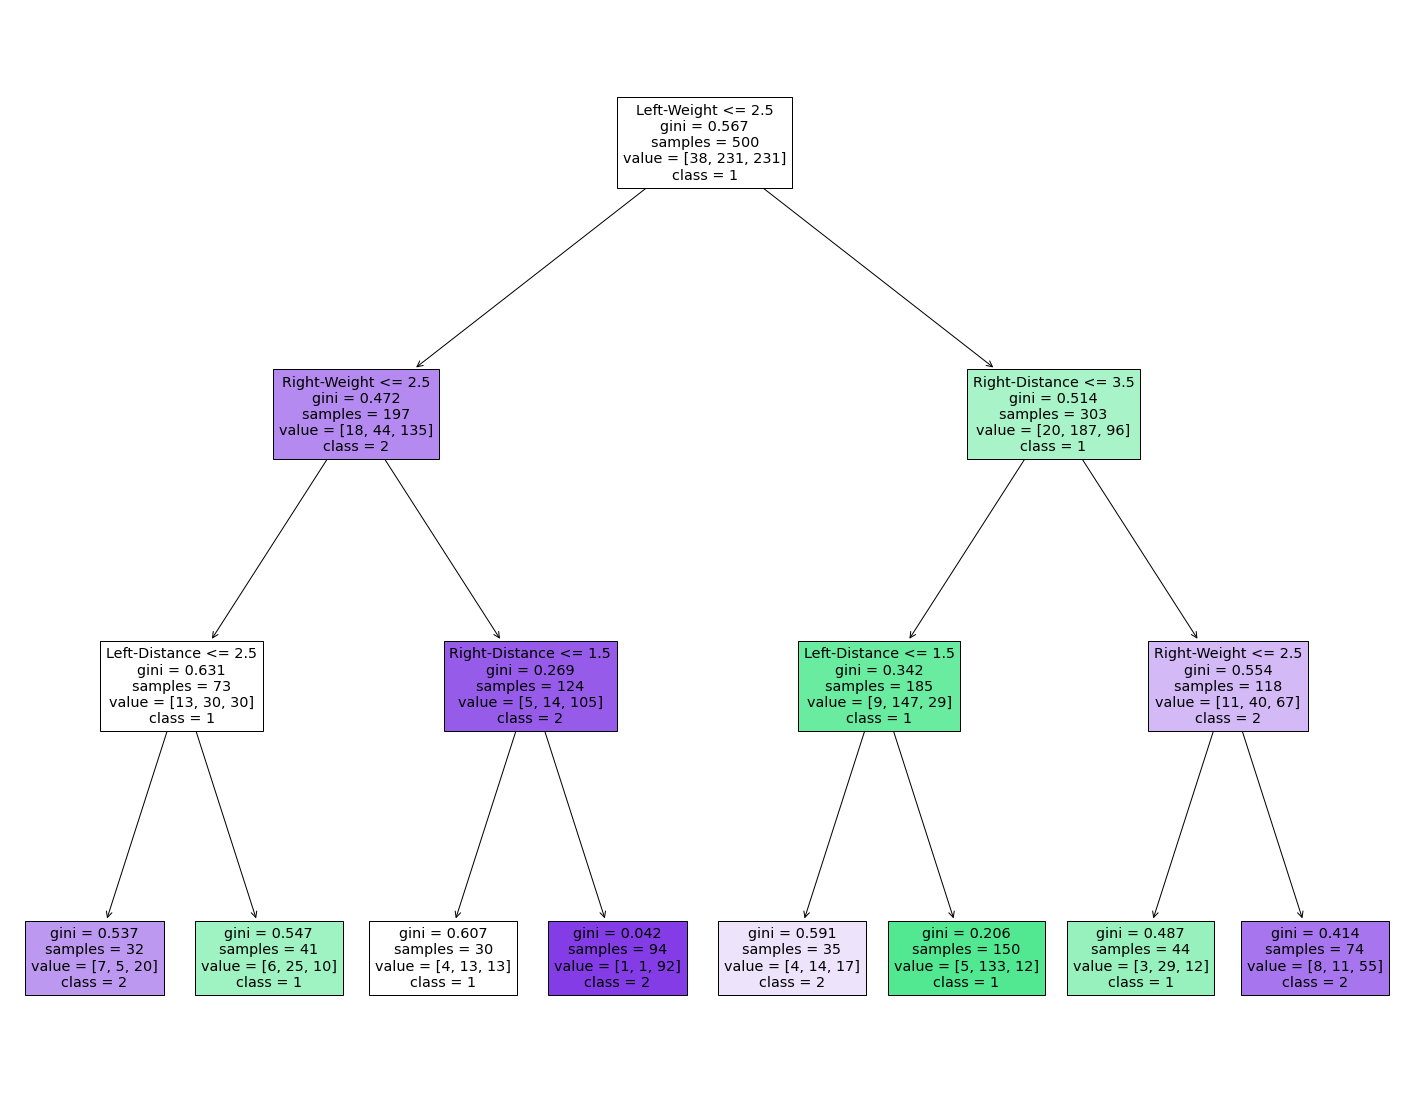

In [32]:
plt.figure(figsize=(25,20))
tree.plot_tree(dt_c, feature_names = feature_cols,
               class_names=['0','1','2'],
               filled=True)
plt.show()

<hr>

In [33]:
# Demonstrate Multiple Datasets and showing evaluation metrics:
summary = pd.DataFrame(columns = ["Split Ratio", "Train data Entries", "Test data Entries", "Accuracy Score"])
ratio=[0.50, 0.40, 0.30, 0.20]
for r in ratio:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=r)
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    m_pred=model.predict(X_test)
    acs = accuracy_score(y_test, m_pred)
    s1={"Split Ratio": r, 
        "Train data Entries":(X_train.shape), 
        "Test data Entries":(X_test.shape),
        "Accuracy Score":acs}
    summary=summary.append(s1, ignore_index=True)
display(summary)

,Split Ratio,Train data Entries,Test data Entries,Accuracy Score
0,0.5,"(312, 4)","(313, 4)",0.773163
1,0.4,"(375, 4)","(250, 4)",0.776000
2,0.3,"(437, 4)","(188, 4)",0.787234
3,0.2,"(500, 4)","(125, 4)",0.800000


<hr>

## References:
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://mljar.com/blog/visualize-decision-tree/
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Conclusion/Results:
This assignment given us the clear idea about the DataFrame, Visulization, ML/Analysis, libraries, datasets and various subparts of sklearn libraries, it's uses and various method to find out the hidden patterns in data and relationa between various features and data stractures. We explored the different fields of classification models, it's parameters and ways of creating linear model. Parameter tuning in Decisiontree model, compairing evaluation metrices and drawing decision tree.
*******************************************************************************************************************************